In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils

In [2]:
area_fractions = {6: 98.41, 11: 36.38, 16: 6.3, 22: 0.45}
max_cd = {1: 65, 5: 25, 15: 25, 30: 25, 50: 25, 100: 25}
norm_current = {
    1: 60,
    5: 15,
    15: 5,
    30: 5,
    50: 5,
    100: 2.5,
}
DIMENSIONS = ('470-470-' + str(v) for v in [1, 5, 15, 30, 50, 100])
IMAGE_IDS = (6, 11, 16, 22)
AREA_FRACTIONS = (0.01, 0.4, 0.75)

In [3]:
def get_folder_path(name_of_study, dimensions, resolution=1, img_id=None, eps=None):
    if eps is None and img_id is None:
        raise ValueError("Both img_id and eps cannot be `None`.")
    if img_id is None and name_of_study == 'contact_loss_lma':
        raise ValueError(f"img_id cannot be `None` for {name_of_study}")
    if eps is None and name_of_study == 'contact_loss_ref':
        raise ValueError(f"eps cannot be `None` for {name_of_study}")
    if eps is None:
        return os.path.join('output', name_of_study, dimensions, str(img_id), str(resolution))
    return os.path.join('output', name_of_study, str(eps), dimensions, str(resolution))


def get_csv_data(csv_data_path):
    data = pd.read_csv(csv_data_path)
    arr1 = data[['vleft [A/m2]', 'freql']].to_numpy()
    arr2 = data[['vleft [A/m2]', 'freqr']].to_numpy()

    return arr1, arr2


def make_plot_left(name_of_study, dimensions, resolution=1, img_id=None, eps=None):
    freq_csv_path = os.path.join(get_folder_path(name_of_study, dimensions, resolution, img_id, eps), "frequency.csv")
    arr1, arr2 = get_csv_data(freq_csv_path)
    Lz = int(dimensions.split("-")[2])
    i_norm = norm_current[Lz]
    arr1[:, 0] = arr1[:, 0] / i_norm
    fig, ax = plt.subplots()
    ax.plot(arr1[:, 0], arr1[:, 1], 'b-', linewidth=2.5, label='left');
    ax.set_ylabel('frequency')
    ax.set_xlabel(f'i/{i_norm}Am' +r'$^{-2}$')
    ax.set_title(r'$L_z$' + f' = {800*Lz/470:.1f} $\mu m$, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}%')
    ax.set_xlim([0, 1]);
    ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    ax.axvline(x=0.4, color='r', linestyle='--', linewidth=0.5)
    ax.grid(True, which='both');
    ax.minorticks_on();
    plt.tight_layout();
    # ax.legend();
    plt.savefig(f'figures/{name_of_study}/frequency-left-{img_id}-{Lz}.png', dpi=1500)


def make_plot_right(name_of_study, dimensions, resolution=1, img_id=None, eps=None):
    freq_csv_path = os.path.join(get_folder_path(name_of_study, dimensions, resolution, img_id, eps), "frequency.csv")
    arr1, arr2 = get_csv_data(freq_csv_path)
    Lz = int(dimensions.split("-")[2])
    i_norm = norm_current[Lz]
    arr2[:, 0] = arr2[:, 0] / i_norm
    fig, ax = plt.subplots()
    ax.plot(arr2[:, 0], arr2[:, 1], 'r-', linewidth=2.5, label='right');
    ax.set_ylabel('frequency')
    ax.set_xlabel(f'i/{i_norm}Am' +r'$^{-2}$')
    ax.set_title(r'$L_z$' + f' = {800*Lz/470:.1f} $\mu m$, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}%')
    ax.set_xlim([0, 1]);
    ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    if int(Lz) == 50:
        ax.axvline(x=0.175, color='b', linestyle='--', linewidth=0.5)
    if int(Lz) == 100:
        ax.axvline(x=0.1125, color='b', linestyle='--', linewidth=0.5)
    ax.grid(True, which='both');
    ax.minorticks_on();
    plt.tight_layout()
    # ax.legend()
    plt.savefig(f'figures/{name_of_study}/frequency-right-{img_id}-{Lz}.png', dpi=1500)


def moments(name_of_study, dimensions, resolution=1, img_id=None, eps=None):
    freq_csv_path = os.path.join(get_folder_path(name_of_study, dimensions, resolution, img_id, eps), "frequency.csv")
    data = pd.read_csv(freq_csv_path)
    avg_val = 0.5 * (data[['vleft [A/m2]']].to_numpy() + data[['vright [A/m2]']].to_numpy())
    final = np.hstack((avg_val, data[['freql']].to_numpy(), data[['freqr']].to_numpy()))
    mu_left = np.dot(final[:, 0], final[:, 1])
    mu_right = np.dot(final[:, 0], final[:, 2])
    sd_left = np.sqrt(np.dot((final[:, 0] - mu_left)**2, final[:, 1]))
    sd_right = np.sqrt(np.dot((final[:, 0] - mu_right)**2, final[:, 2]))
    stats = {"mu_left": mu_left, "sd_left": sd_left, "mu_right": mu_right, "sd_right": sd_right}
    return stats, final

### Frequency Distribution of Current Density for Thickness and Active Area Fraction

In [4]:
name_of_study = 'contact_loss_lma'
df = pd.read_csv('data/current-density-zero-right.csv')
df.head(), df.columns

(   Thickness, Lz [um]  Left Active Area, A/A0  Fraction of A0 (i ≈ 0)
 0                 1.7                   36.38                   54.36
 1                 1.7                    6.30                   90.42
 2                 1.7                    0.45                   99.24
 3                85.0                   36.38                    1.00
 4                85.0                    6.30                   22.64,
 Index(['Thickness, Lz [um]', 'Left Active Area, A/A0',
        'Fraction of A0 (i ≈ 0)'],
       dtype='object'))

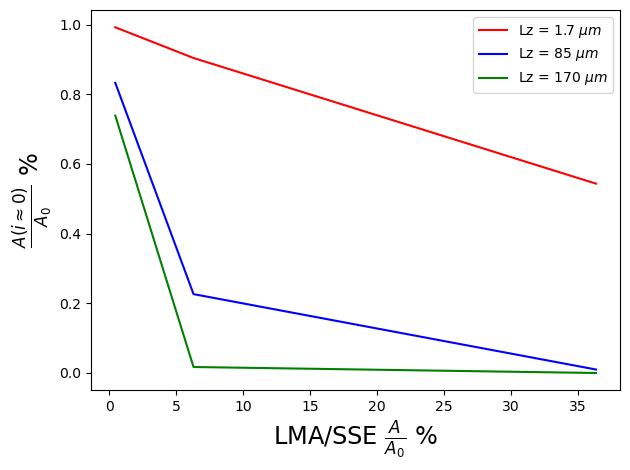

In [6]:
fig, ax = plt.subplots()
colors = {'r': 1.7, 'b': 85, 'g': 170}
data_arr = np.array(df.to_numpy(), dtype=float)
for c, v in colors.items():
    data = data_arr[np.isclose(data_arr[:, 0], v), :]
    ax.plot(data[:, 1], data[:, 2]/100, color=c, label=f'Lz = {v} ' + r'$\mu m$')
ax.set_xlabel(r'LMA/SSE $\frac{A}{A_0}$ %', fontsize='xx-large')
ax.set_ylabel(r'$\frac{A(i \approx 0)}{A_0}$ %', fontsize='xx-large')
ax.legend()
plt.tight_layout()
plt.savefig(f'figures/current_density_zero_right.png', dpi=1500)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

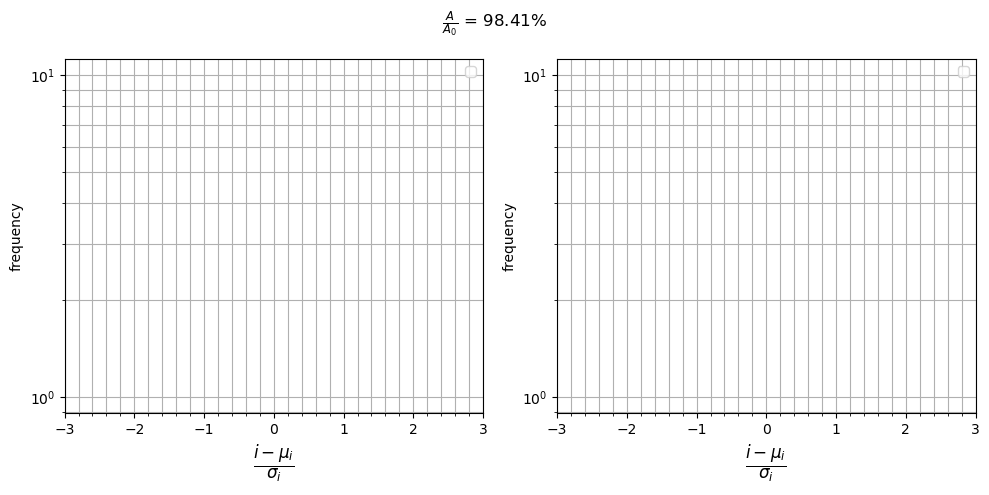

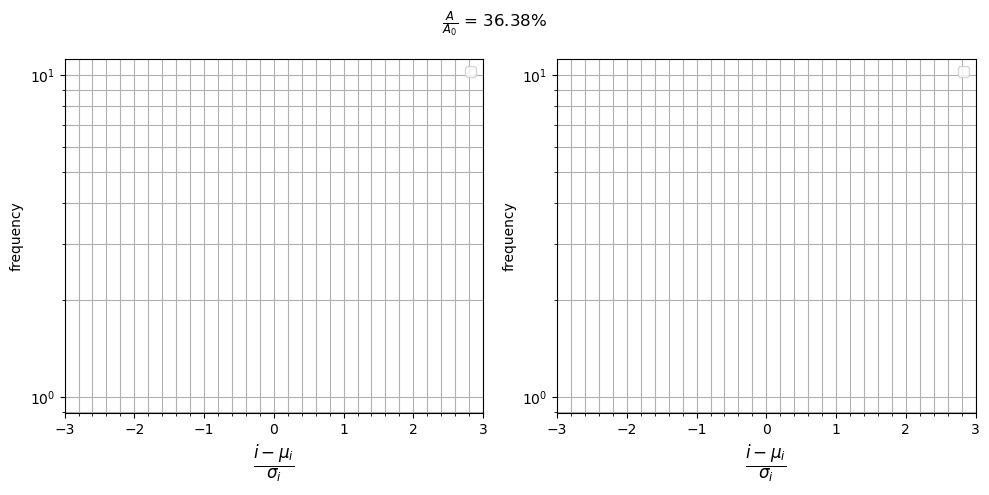

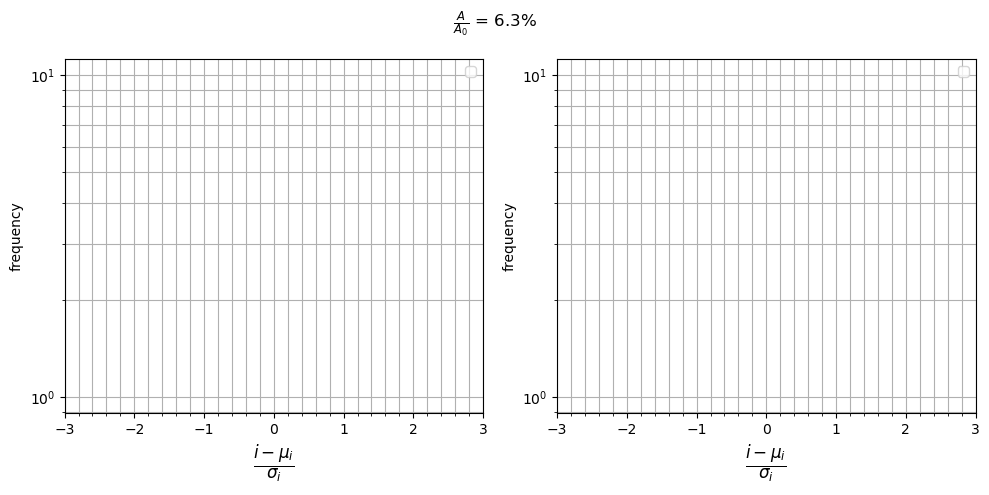

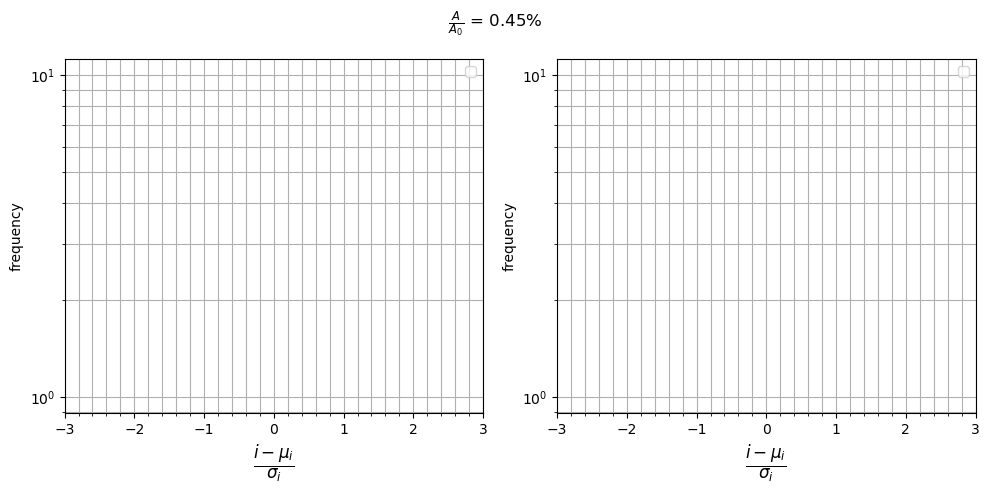

In [8]:
name_of_study = 'contact_loss_lma'
utils.make_dir_if_missing(f'figures/{name_of_study}')
moments_data = []
styles = ['k-', 'r-', 'b-', 'r-.', 'b-.', 'g-'][1:]
for img_id in IMAGE_IDS:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(r'$\frac{A}{A_0}$' + f' = {area_fractions[img_id]}%')
    for idx, dimensions in enumerate(DIMENSIONS):
        Lz = int(dimensions.split("-")[2])
        try:
            stats, final = moments(name_of_study, dimensions, resolution=1, img_id=img_id, eps=None)
        except FileNotFoundError:
            print(f"File not found for {dimensions} and img_id {img_id}")
            continue
        mu_left = stats['mu_left']
        sd_left = stats['sd_left']
        mu_right = stats['mu_right']
        sd_right = stats['sd_right']
        z_left = (final[:, 0] - mu_left) / sd_left
        z_right = (final[:, 0] - mu_right) / sd_right
        moments_data.append((Lz, img_id, mu_left, sd_left, mu_right, sd_right))
        ax[0].plot(z_left, final[:, 1], styles[idx], label=f'{Lz*800/470:.1f}' + r' $\mu m$')
        ax[1].plot(z_right, final[:, 2], styles[idx], label=f'{Lz*800/470:.1f}' + r' $\mu m$')
    ax[0].set_xlim([-3, 3])
    ax[1].set_xlim([-3, 3])
    # ax[0].set_ylim([0, 1])
    # ax[1].set_ylim([0, 1])
    ax[0].grid(True, which='both');
    ax[0].minorticks_on();
    ax[1].grid(True, which='both');
    ax[1].minorticks_on();
    ax[0].set_xlabel(r'$\frac{i-\mu_i}{\sigma_i}$', fontsize='xx-large')
    ax[1].set_xlabel(r'$\frac{i-\mu_i}{\sigma_i}$', fontsize='xx-large')
    ax[0].set_ylabel('frequency')
    ax[1].set_ylabel('frequency')
    # fig.legend(['left', 'right'])
    ax[0].legend();
    ax[1].legend();
    ax[0].set_yscale('log');
    ax[1].set_yscale('log');
    plt.tight_layout();
    plt.savefig(f'figures/{name_of_study}/current-density-moments-image-{img_id}.png', dpi=1500);


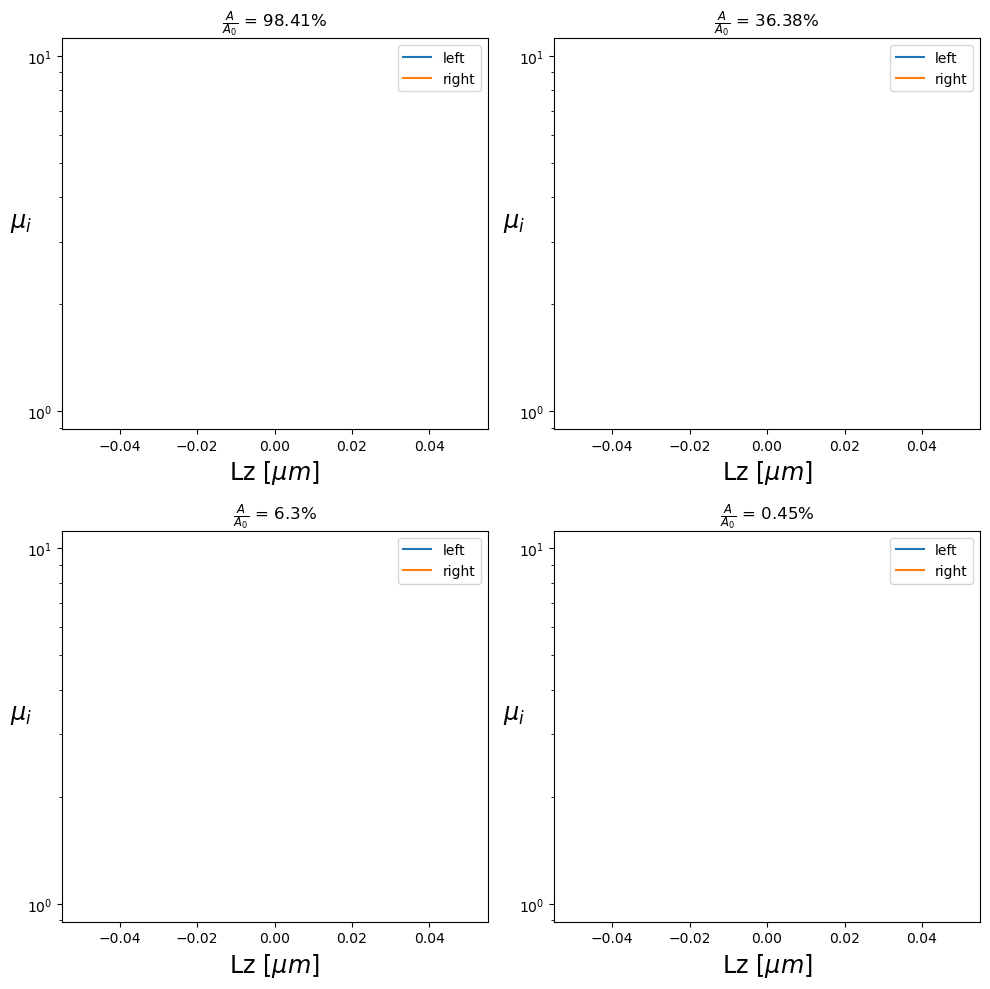

In [9]:
df_new = pd.DataFrame(moments_data, columns=['Lz', 'img_id', 'mu_left', 'sd_left', 'mu_right', 'sd_right'])
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for idx, img_id in enumerate(IMAGE_IDS):
    df_new2 = df_new[df_new['img_id'] == img_id].to_numpy() 
    if idx == 0:
        ax[0, 0].plot(df_new2[:, 0], df_new2[:, 2], label='left')
        ax[0, 0].plot(df_new2[:, 0], df_new2[:, 4], label='right')
        ax[0, 0].set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    elif idx == 1:
        ax[0, 1].plot(df_new2[:, 0], df_new2[:, 2], label='left')
        ax[0, 1].plot(df_new2[:, 0], df_new2[:, 4], label='right')
        ax[0, 1].set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    elif idx == 2:
        ax[1, 0].plot(df_new2[:, 0], df_new2[:, 2], label='left')
        ax[1, 0].plot(df_new2[:, 0], df_new2[:, 4], label='right')
        ax[1, 0].set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    elif idx == 3:
        ax[1, 1].plot(df_new2[:, 0], df_new2[:, 2], label='left')
        ax[1, 1].plot(df_new2[:, 0], df_new2[:, 4], label='right')
        ax[1, 1].set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    else:
        continue
ax[0, 0].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')
ax[0, 1].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')
ax[1, 0].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')
ax[1, 1].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')

ax[0, 0].set_ylabel(r'$\mu_i$', fontsize='xx-large', rotation='horizontal')
ax[0, 1].set_ylabel(r'$\mu_i$', fontsize='xx-large', rotation='horizontal')
ax[1, 0].set_ylabel(r'$\mu_i$', fontsize='xx-large', rotation='horizontal')
ax[1, 1].set_ylabel(r'$\mu_i$', fontsize='xx-large', rotation='horizontal')
ax[0, 0].set_yscale('log')
ax[0, 1].set_yscale('log')
ax[1, 0].set_yscale('log')
ax[1, 1].set_yscale('log')
ax[0, 0].legend()
ax[1, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()
plt.tight_layout()
plt.savefig(f'figures/{name_of_study}/current-density-moments-means.png', dpi=1500)

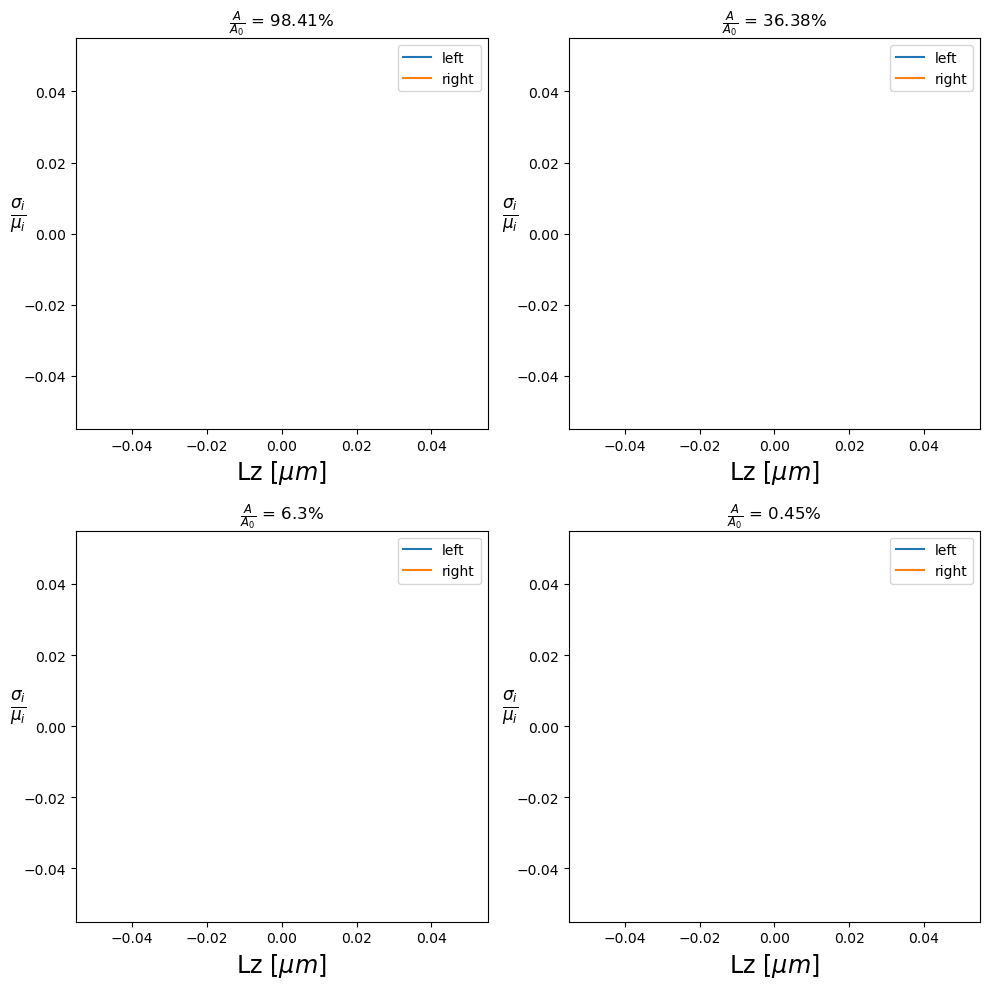

In [10]:
df_new = pd.DataFrame(moments_data, columns=['Lz', 'img_id', 'mu_left', 'sd_left', 'mu_right', 'sd_right'])
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for idx, img_id in enumerate(IMAGE_IDS):
    df_new2 = df_new[df_new['img_id'] == img_id].to_numpy() 
    if idx == 0:
        ax[0, 0].plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], label='left')
        ax[0, 0].plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], label='right')
        ax[0, 0].set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    elif idx == 1:
        ax[0, 1].plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], label='left')
        ax[0, 1].plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], label='right')
        ax[0, 1].set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    elif idx == 2:
        ax[1, 0].plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], label='left')
        ax[1, 0].plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], label='right')
        ax[1, 0].set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    elif idx == 3:
        ax[1, 1].plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], label='left')
        ax[1, 1].plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], label='right')
        ax[1, 1].set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    else:
        continue
ax[0, 0].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')
ax[0, 1].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')
ax[1, 0].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')
ax[1, 1].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')

ax[0, 0].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal')
ax[0, 1].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal')
ax[1, 0].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal')
ax[1, 1].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal')

ax[0, 0].legend()
ax[1, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()
plt.tight_layout()
plt.savefig(f'figures/{name_of_study}/current-density-moments.png', dpi=1500)

In [11]:
for dimensions in DIMENSIONS:
    for img_id in IMAGE_IDS:
        try:
            make_plot_left(name_of_study, dimensions, resolution=1, img_id=img_id, eps=None)
        except FileNotFoundError:
            print(f"No file for {dimensions}")

for dimensions in DIMENSIONS:
    Lz = int(dimensions.split("-")[2])
    for img_id in IMAGE_IDS:
        try:
            make_plot_right(name_of_study, dimensions, resolution=1, img_id=img_id, eps=None)
        except FileNotFoundError:
            print(f"No file for {dimensions}")

## Contact Loss Reference

In [ ]:
name_of_study = 'contact_loss_ref'

utils.make_dir_if_missing(f'figures/{name_of_study}')

for dimensions in DIMENSIONS:
    for eps in AREA_FRACTIONS:
        try:
            make_plot_left(name_of_study, dimensions, resolution=1, img_id=None, eps=eps)
        except FileNotFoundError:
            print(f"No file for {dimensions} and eps {eps}")

for dimensions in DIMENSIONS:
    Lz = int(dimensions.split("-")[2])
    for eps in AREA_FRACTIONS:
        try:
            make_plot_right(name_of_study, dimensions, resolution=1, img_id=img_id, eps=eps)
        except FileNotFoundError:
            print(f"No file for {dimensions} and eps {eps}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


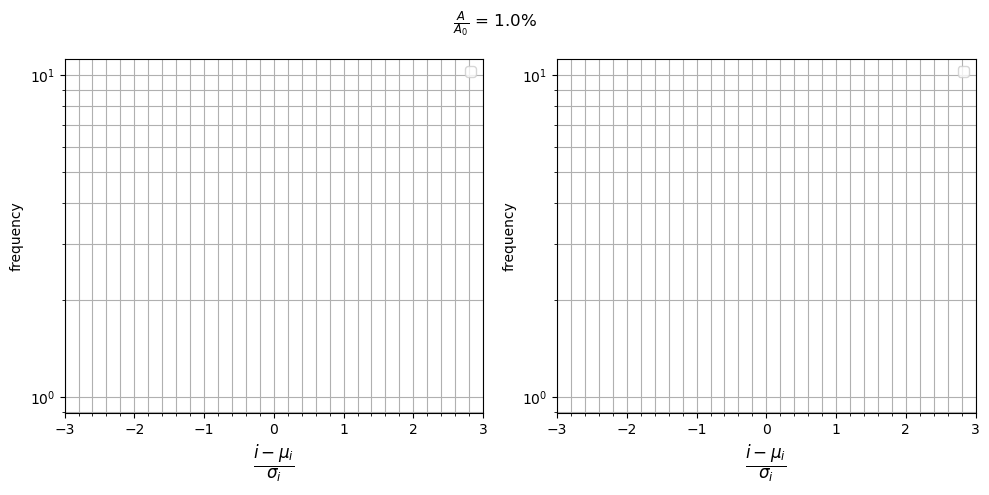

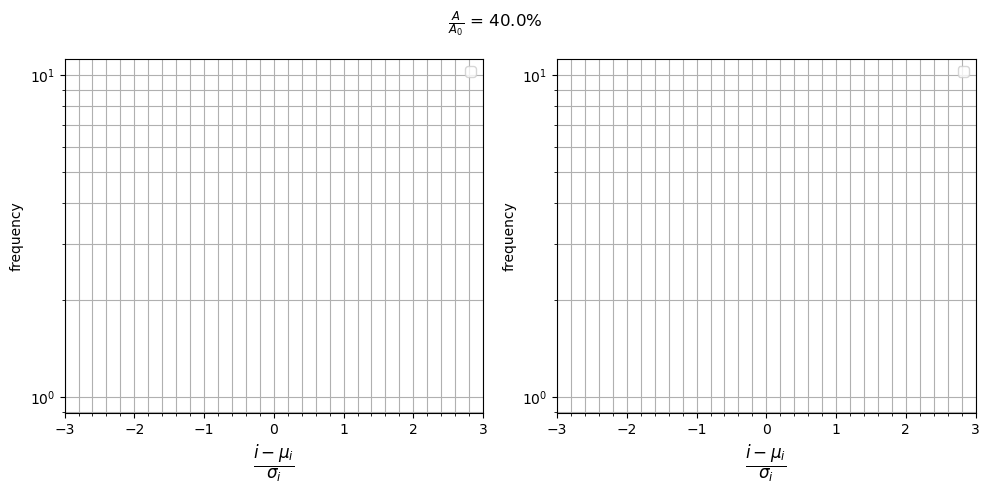

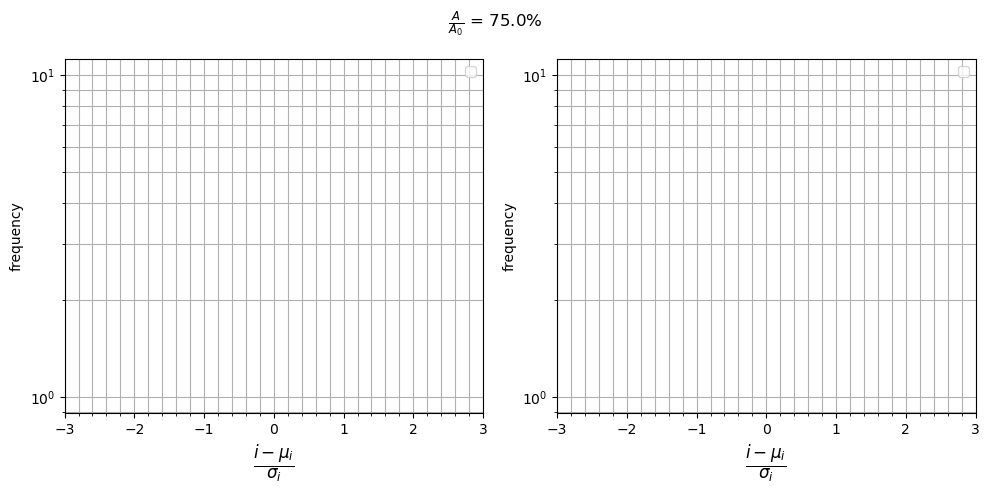

In [12]:
moments_data = []
styles = ['k-', 'r-', 'b-', 'r-.', 'b-.', 'g-'][1:]
for eps in AREA_FRACTIONS:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(r'$\frac{A}{A_0}$' + f' = {eps*100:.1f}%')
    for idx, dimensions in enumerate(DIMENSIONS):
        Lz = int(dimensions.split("-")[2])
        try:
            stats, final = moments(name_of_study, dimensions, resolution=1, img_id=None, eps=eps)
        except FileNotFoundError:
            print(f"File not found for {dimensions} and area fraction {eps}")
            continue
        mu_left = stats['mu_left']
        sd_left = stats['sd_left']
        mu_right = stats['mu_right']
        sd_right = stats['sd_right']
        z_left = (final[:, 0] - mu_left) / sd_left
        z_right = (final[:, 0] - mu_right) / sd_right
        moments_data.append((Lz, eps, mu_left, sd_left, mu_right, sd_right))
        ax[0].plot(z_left, final[:, 1], styles[idx], label=f'{Lz*800/470:.1f}' + r' $\mu m$')
        ax[1].plot(z_right, final[:, 2], styles[idx], label=f'{Lz*800/470:.1f}' + r' $\mu m$')
    ax[0].set_xlim([-3, 3])
    ax[1].set_xlim([-3, 3])
    # ax[0].set_ylim([0, 1])
    # ax[1].set_ylim([0, 1])
    ax[0].grid(True, which='both');
    ax[0].minorticks_on();
    ax[1].grid(True, which='both');
    ax[1].minorticks_on();
    ax[0].set_xlabel(r'$\frac{i-\mu_i}{\sigma_i}$', fontsize='xx-large')
    ax[1].set_xlabel(r'$\frac{i-\mu_i}{\sigma_i}$', fontsize='xx-large')
    ax[0].set_ylabel('frequency')
    ax[1].set_ylabel('frequency')
    # fig.legend(['left', 'right'])
    ax[0].legend();
    ax[1].legend();
    ax[0].set_yscale('log');
    ax[1].set_yscale('log');
    plt.tight_layout();
    plt.savefig(f'figures/{name_of_study}/current-density-moments-image-{eps}.png', dpi=1500);

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

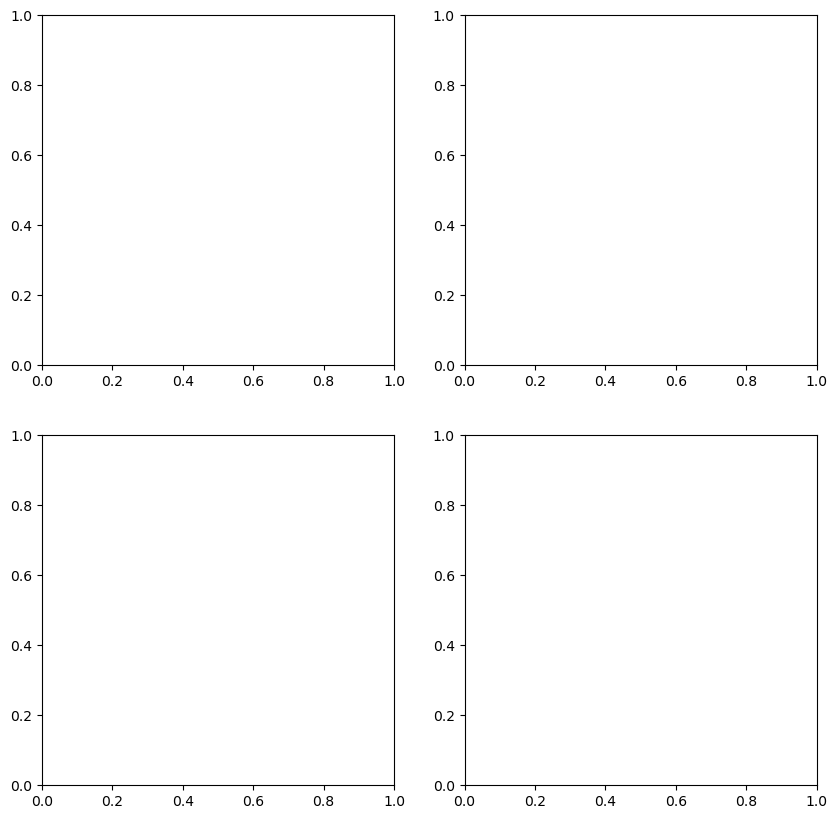

In [18]:
df_new = pd.DataFrame(moments_data, columns=['Lz', 'img_id', 'mu_left', 'sd_left', 'mu_right', 'sd_right'])
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for idx, eps in enumerate(AREA_FRACTIONS):
    rows = df_new['img_id'].to_numpy().reshape(-1, 1)
    df_new2 = df_new.loc[np.isclose(rows, eps)].to_numpy() 
    if idx == 0:
        ax[0, 0].plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], label='left')
        ax[0, 0].plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], label='right')
        ax[0, 0].set_title(r'$\frac{A}{A_0}$ = ' + f'{eps*100:.1f}%')
    elif idx == 1:
        ax[0, 1].plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], label='left')
        ax[0, 1].plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], label='right')
        ax[0, 1].set_title(r'$\frac{A}{A_0}$ = ' + f'{eps*100:.1f}%')
    elif idx == 2:
        ax[1, 0].plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], label='left')
        ax[1, 0].plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], label='right')
        ax[1, 0].set_title(r'$\frac{A}{A_0}$ = ' + f'{eps*100:.1f}%')
    elif idx == 3:
        ax[1, 1].plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], label='left')
        ax[1, 1].plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], label='right')
        ax[1, 1].set_title(r'$\frac{A}{A_0}$ = ' + f'{eps*100:.1f}%')
    else:
        continue
ax[0, 0].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')
ax[0, 1].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')
ax[1, 0].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')
ax[1, 1].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')

ax[0, 0].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal')
ax[0, 1].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal')
ax[1, 0].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal')
ax[1, 1].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal')

ax[0, 0].legend()
ax[1, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()
plt.tight_layout()
plt.savefig(f'figures/{name_of_study}/current-density-moments.png', dpi=1500)